In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating/train.csv
/kaggle/input/recipe-for-rating/test.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Data Loading
### We have two csv files for training (train.csv) and testing (test.csv) which we will be converting into pandas dataframes

In [6]:
# Loading training data
train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
# Loading testing data
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')


In [7]:
train.head() #Checking the first five rows of training data

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [8]:
test.head() #Checking the first five rows of test data

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [9]:
train.info() # Display basic information about the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [10]:
test.info() # Display basic information about the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


### We can conclude from the information obtained above that the test data has no missing values whereas the training data has 2 missing values in the Recipe Review column

In [11]:
train.isnull().sum() #Checking for missing values in training data

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [12]:
test.isnull().sum() #Checking for missing values in test data

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

### Checking how many features are numerical and how many are categorical

In [13]:
# Identify numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

print("Numerical columns:")
print(numerical_columns)
print("\nCategorical columns:")
print(categorical_columns)


Numerical columns:
Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore'],
      dtype='object')

Categorical columns:
Index(['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review'], dtype='object')


In [14]:
## Exploratory Data Analysis: Visualization of Dataset Statistics and Key Features 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### These plots show us the distribution of various numerical features in the dataset

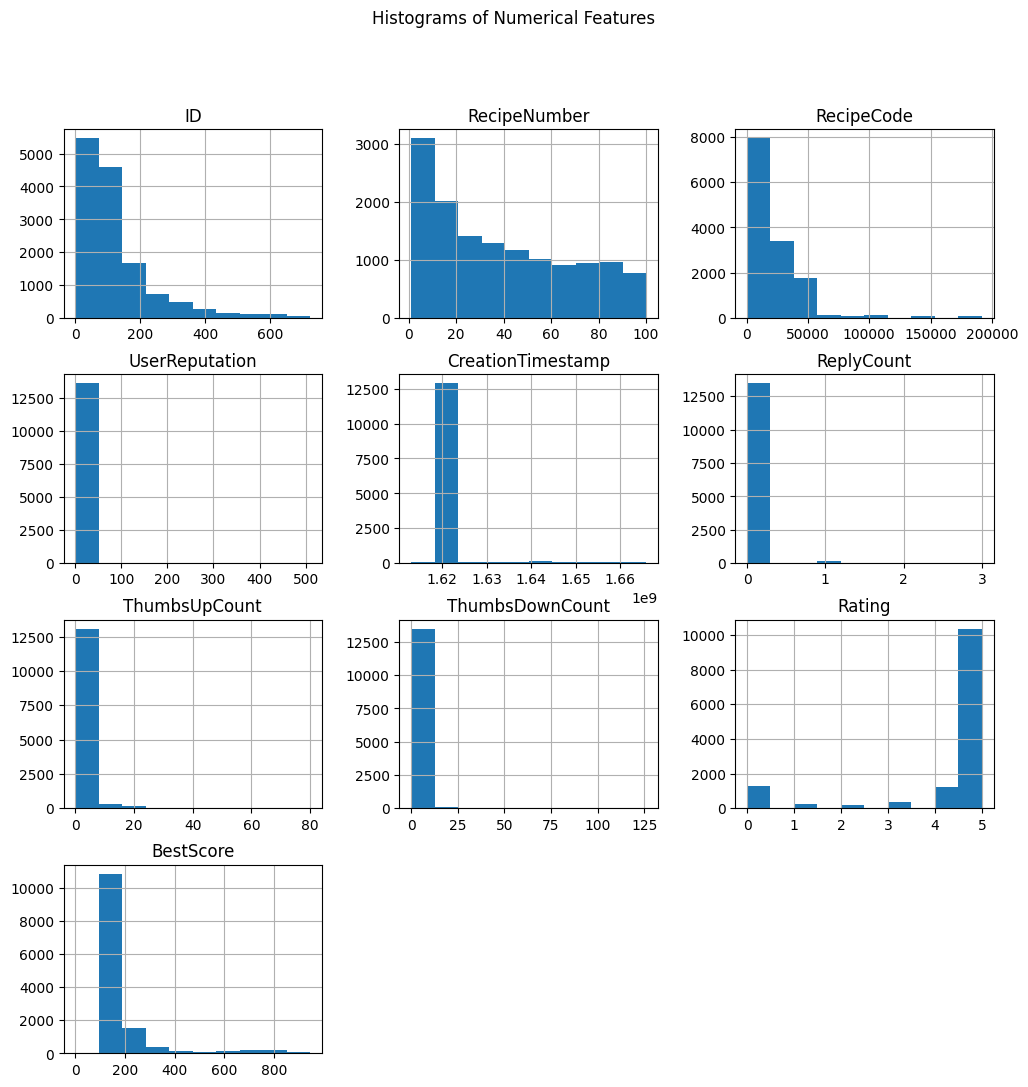

In [16]:
# Plot histogram for numerical features
numerical_features = train.select_dtypes(include=['int64']).columns
train[numerical_features].hist(figsize=(12, 12))
plt.suptitle('Histograms of Numerical Features')
plt.show()

### This plots show us the distribution of various categorical features in the dataset

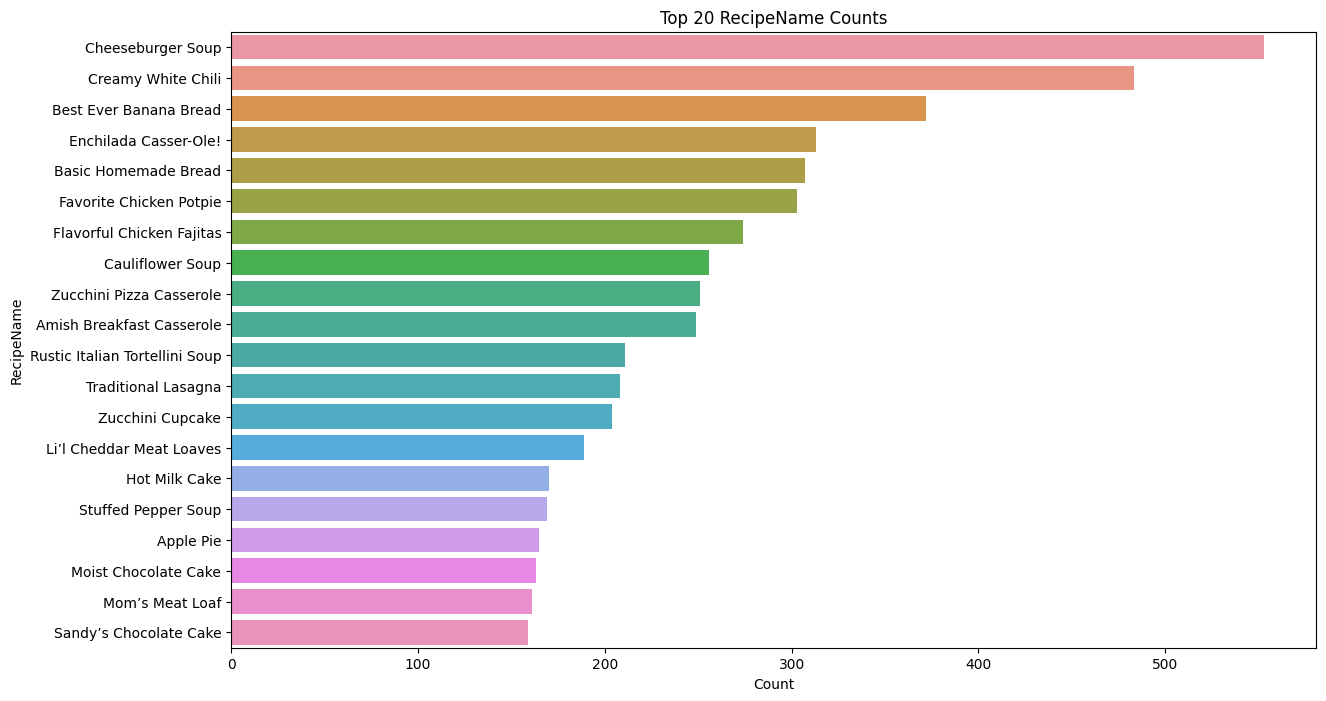

In [17]:
# Plot count plot for the categorical variable "RecipeName"
plt.figure(figsize=(14, 8))
sns.countplot(data=train, y='RecipeName', order=train['RecipeName'].value_counts().index[:20])
plt.title('Top 20 RecipeName Counts')
plt.xlabel('Count')
plt.ylabel('RecipeName')
plt.show()

## Top Rated Recipe: Recipe with most 5 ratings

In [18]:
# Group the DataFrame by recipe names and count the number of rating 5 occurrences
rating_counts = train[train['Rating'] == 5].groupby('RecipeName').size()

# Find the recipe with the maximum count of rating 5
recipe_with_most_5_ratings = rating_counts.idxmax()

# Get the count of 5 ratings for the recipe with the most 5 ratings
max_5_ratings = rating_counts.max()

print("Recipe with most 5 ratings:", recipe_with_most_5_ratings)
print("Number of 5 ratings:", max_5_ratings)


Recipe with most 5 ratings: Cheeseburger Soup
Number of 5 ratings: 453


## Worst Rated Recipe: Recipe with most 0 ratings

In [19]:
# Group the DataFrame by recipe names and count the number of rating 5 occurrences
rating_counts = train[train['Rating'] == 0].groupby('RecipeName').size()

# Find the recipe with the maximum count of rating 5
recipe_with_most_5_ratings = rating_counts.idxmax()

# Get the count of 5 ratings for the recipe with the most 5 ratings
max_5_ratings = rating_counts.max()

print("Recipe with most 0 ratings:", recipe_with_most_5_ratings)
print("Number of 0 ratings:", max_5_ratings)

Recipe with most 0 ratings: Pineapple Orange Cake
Number of 0 ratings: 63


# Data Preprocessing
### Checking for missing, duplicate values and dealing with them appropriately

In [20]:
train.duplicated().value_counts() # Checking for duplicate rows in training data

False    13636
Name: count, dtype: int64

### Dropping irrelevant feature columns from the training data

In [21]:
train_buffer=train.drop(['ID','RecipeNumber','RecipeName','RecipeCode','CommentID','UserID','UserName','CreationTimestamp'],axis='columns')

In [22]:
train_buffer.head() #Checking the first five rows of training data after dropping irrelevant columns

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,20,0,0,0,5,100,great recipe! I have made them just as written...
1,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,1,0,0,0,3,100,I think I was looking for something extra spec...
3,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


### Since there are only two instances where there is a missing value in the Recipe_Review column, we believe that dropping these rows would be the best option.

In [23]:
train_buffer.dropna(subset=['Recipe_Review'], inplace=True)

In [24]:
train_buffer.info() # All the missing values have been removed

<class 'pandas.core.frame.DataFrame'>
Index: 13634 entries, 0 to 13635
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserReputation   13634 non-null  int64 
 1   ReplyCount       13634 non-null  int64 
 2   ThumbsUpCount    13634 non-null  int64 
 3   ThumbsDownCount  13634 non-null  int64 
 4   Rating           13634 non-null  int64 
 5   BestScore        13634 non-null  int64 
 6   Recipe_Review    13634 non-null  object
dtypes: int64(6), object(1)
memory usage: 852.1+ KB


## Dealing with Text Data in the Recipe_Review column

In [25]:
X=train_buffer.drop(['Rating'],axis='columns')
Y=train_buffer['Rating']

In [26]:
X.head()


,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,20,0,0,0,100,great recipe! I have made them just as written...
1,1,0,0,1,100,This is an easy and quick recipe that is great...
2,1,0,0,0,100,I think I was looking for something extra spec...
3,1,0,0,0,100,This is our favorite grilled chicken recipe. ...
4,1,0,0,0,100,Great basic recipe. I added 2 teaspoons Tuscan...


## Splitting the data from train.csv into train and validation sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

## Separating the numerical and the text based features in both X_train and X_val

In [28]:
X_train_num=X_train.drop(['Recipe_Review'],axis='columns')
X_val_num=X_val.drop(['Recipe_Review'],axis='columns')
X_train_txt=X_train['Recipe_Review']
X_val_txt=X_val['Recipe_Review']

In [29]:
X_train_txt.head() # Displaying the Text Data in the training dataset

8376     WVALLJ -I think that applesauce would be an id...
8945     when i make chili i brown the meat then add al...
12430    So easy and good!  I substituted broccoli for ...
532      My pie did not turn out as expected, was very ...
12109    Very delicious and moist, I cut the sugar down...
Name: Recipe_Review, dtype: object

## Using TfidfVectorizer to vectorize the text data

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "Recipe_Review" column
X_train_txt_vec = tfidf_vectorizer.fit_transform(X_train_txt)
X_val_txt_vec = tfidf_vectorizer.transform(X_val_txt)

### Using Standard Scaler to scale the numerical features


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)

### Horizontally stacking the numerical and the vectorized text features

In [32]:
X_train_stacked=np.hstack([X_train_num_scaled,X_train_txt_vec.toarray()])
X_val_stacked=np.hstack([X_val_num_scaled,X_val_txt_vec.toarray()])

In [33]:
X_train_stacked.shape
X_val_stacked.shape

(2727, 9430)

## Visulization of the relationships between the numerical features

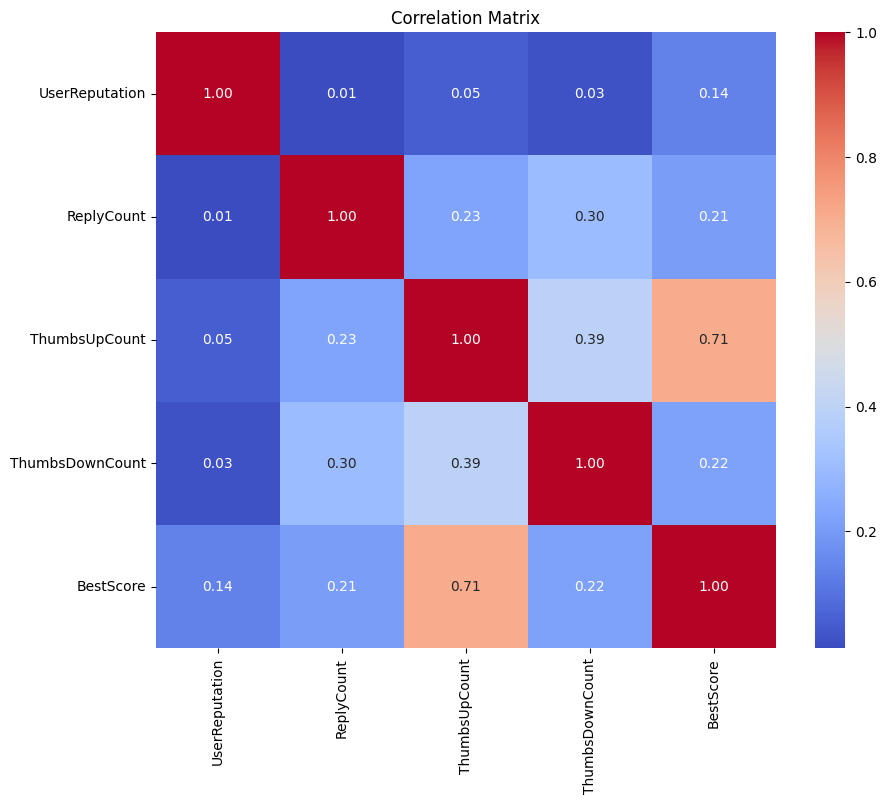

In [34]:
# Compute the correlation matrix
correlation_matrix = X_train_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

## Using a Dummy Classifier to predict the rating

### Note: We use the word validation instead of test to avoid confusion with the test dataset but the prediction is made on the validation dataset and the performance of the model is evaluated on the validation dataset obtained from X_train

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier to the training data
dummy_clf.fit(X_train_stacked, y_train)

# Evaluate the classifier on the training data
train_accuracy = accuracy_score(y_train, dummy_clf.predict(X_train_stacked))
print("Training Accuracy: ",train_accuracy)

Training Accuracy:  0.7597872925644081


In [36]:
# Evaluate the classifier on the validation data
val_accuracy = accuracy_score(y_val, dummy_clf.predict(X_val))
print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.7634763476347635


## Making the test data ready 

In [37]:
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


### Removing irrelevant feature columns from the test data (same as that of the training data)

In [38]:
test_buffer=test.drop(['ID','RecipeCode','RecipeNumber','RecipeName','CommentID','UserID','UserName','CreationTimestamp'],axis='columns')

In [39]:
test_buffer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserReputation   4546 non-null   int64 
 1   ReplyCount       4546 non-null   int64 
 2   ThumbsUpCount    4546 non-null   int64 
 3   ThumbsDownCount  4546 non-null   int64 
 4   BestScore        4546 non-null   int64 
 5   Recipe_Review    4546 non-null   object
dtypes: int64(5), object(1)
memory usage: 213.2+ KB


### Performing the same preprocessing steps as in the training data

In [40]:
X_test_num=test_buffer.drop(['Recipe_Review'],axis='columns')
X_test_txt=test_buffer['Recipe_Review']
X_test_txt_vec = tfidf_vectorizer.transform(X_test_txt)
X_test_num_scaled = scaler.fit_transform(X_test_num)
X_test_stacked=np.hstack([X_test_num_scaled,X_test_txt_vec.toarray()])
X_test_stacked.shape

(4546, 9430)

### Making predictions using the Dummy Classifier

In [41]:
predictions_on_test=dummy_clf.predict(X_test_stacked)

# Highlighting Ideas learnt from the dataset

### 1. The dataset doesn't have many missing values.
### 2.  However the dataset is highly imbalanced which can be seen from the Exploratory Data Analysis step carried out earlier. 
### 3. If we consider the popularity of a recipe on the basis of the number of reviews written about it then from our analysis, we can conclude that Cheeseburger Soup is the most popularly reviewed recipe followed by Creamy White Chili. The least reviewed recipe is Sandy's Chocolate Cake.
### 4.  The top rated recipe is Cheeseburger Soup as it has the most number of 5 ratings.
### 5. The worst rated recipe is Pineapple Orange Cake as it has the most number of 0 ratings.

# Model 1: Logistic Regression
###  Logistic Regression would be a suitable choice for our baseline model, since there are a finite number of possible ratings that we can assign to a recipe.

### We use Hyperparameter tuning to find the best model

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2']
}
logistic_regression_model = LogisticRegression(solver='lbfgs')


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_stacked, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the model with best hyperparameters on the entire training dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train_stacked, y_train)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


LogisticRegression(C=1)

In [43]:
# Performing cross-validation
cv_scores = cross_val_score(best_model, X_train_stacked, y_train, cv=10)  # 5-fold cross-validation

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Mean Cross-Validation Score: 0.7736317157056483


In [44]:
from sklearn.metrics import accuracy_score
# Predictions on training set
train_predictions = best_model.predict(X_train_stacked)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Predictions on validation set
val_predictions = best_model.predict(X_val_stacked)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.808013202530485
Validation Accuracy: 0.7781444811147782


In [45]:
# Predictions on test set
test_predictions1 = best_model.predict(X_test_stacked)

In [46]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions1)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)


Number of unique values: 6


In [47]:
'''# Creating a submission file
output=pd.DataFrame(columns=['ID','Rating'])
output['ID']=[i for i in range(1,len(test_predictions1)+1)]
output['Rating']=test_predictions1
output.to_csv('submission.csv',index=False)
pd.read_csv('submission.csv')'''

"# Creating a submission file\noutput=pd.DataFrame(columns=['ID','Rating'])\noutput['ID']=[i for i in range(1,len(test_predictions1)+1)]\noutput['Rating']=test_predictions1\noutput.to_csv('submission.csv',index=False)\npd.read_csv('submission.csv')"

# Model 2: KNN Classifer 

### We use the KNN Classifier to predict the rating, we try different hyperparameters to find the best model but do not explicitly use GridSearchCV here due to the tremenous amount of time it takes to run

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters with default values
n_neighbors_value = 12  #12
weights_value = 'uniform' #uniform
algorithm_value = 'auto' #auto
metric_value ='euclidean' #minkowski

# Initialize KNeighborsClassifier with specified hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors_value,
                                 weights=weights_value,
                                 algorithm=algorithm_value,
                                 metric=metric_value)

# Fit the KNeighborsClassifier to the training data
knn_model.fit(X_train_stacked, y_train)

# Predict on the training data and calculate accuracy
train_accuracy = accuracy_score(y_train, knn_model.predict(X_train_stacked))
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.7682222425964976


In [49]:
# Predict on the validation data and calculate accuracy
val_accuracy = accuracy_score(y_val, knn_model.predict(X_val_stacked))
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7653098643197653


In [50]:
# Predict on the test data
test_predictions2 = knn_model.predict(X_test_stacked)

In [51]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions2)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)


Number of unique values: 6


# Model 3: Decision Tree Classifier 

### We use the decision tree classifier to predict the rating we try different hyperparameters to find the best model but do not explicitly use GridSearchCV here due to the large number of hyperparameters that we have to try and the tremenous amount of time it takes to run.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define parameters (set to default values)
criterion = 'gini'          # default criterion
splitter = 'best'           # default splitter
max_depth = 6            # default max_depth
min_samples_split = 3 # default min_samples_split
# Additional parameters to try out and alter
min_samples_leaf = 3       # default min_samples_leaf
max_features = None        # default max_features
max_leaf_nodes = None       # default max_leaf_nodes
min_impurity_decrease = 0.0 # default min_impurity_decrease
# Initialize Decision Tree Classifier with default parameters
'''dtc = DecisionTreeClassifier(criterion=criterion,
                             splitter=splitter,
                             max_depth=max_depth,
                             min_samples_split=min_samples_split,
                             random_state=42)'''
# Initialize the DecisionTreeClassifier with specified parameters
dtc = DecisionTreeClassifier(criterion=criterion,
                                       splitter=splitter,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf,
                                       max_features=max_features,
                                       max_leaf_nodes=max_leaf_nodes,
                                       min_impurity_decrease=min_impurity_decrease,
                                       random_state=42)

# Fit the classifier to the training data
dtc.fit(X_train_stacked, y_train)

# Evaluate the classifier on the training data
train_accuracy = accuracy_score(y_train, dtc.predict(X_train_stacked))
print("Training Accuracy:", train_accuracy)

# Predict on the validation set
y_pred = dtc.predict(X_val_stacked)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Training Accuracy: 0.7776657192628588
Validation Accuracy: 0.751008434176751


In [54]:
# Predict on the test data
test_predictions4 = dtc.predict(X_test_stacked)

In [55]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions4)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)


Number of unique values: 6


# Model 4: Random Forest Classifier

### We try out random forest classifier to predict the rating and try out different Hyperparameters to find the best model without explicitly using GridSearchCV

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define parameters (set to default values)
n_estimators = 100      # default n_estimators
max_depth = 6      # default max_depth
criterion = 'gini'          # default criterion
min_samples_split = 3      # default min_samples_split

# Initialize Random Forest Classifier with default parameters
rfc = RandomForestClassifier(n_estimators=n_estimators,
                              criterion=criterion,
                              max_depth=max_depth,
                              min_samples_split=min_samples_split,
                              random_state=42)

# Fit the classifier to the training data
rfc.fit(X_train_stacked, y_train)

# Evaluate the classifier on the training data
train_accuracy = accuracy_score(y_train, rfc.predict(X_train_stacked))
print("Training Accuracy:", train_accuracy)

# Predict on the validation set
y_pred = rfc.predict(X_val_stacked)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Training Accuracy: 0.7597872925644081
Validation Accuracy: 0.7634763476347635


In [58]:
# Predict on the test data
test_predictions5 = rfc.predict(X_test_stacked)

In [59]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions5)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)

Number of unique values: 1


# Model 5: Bagging classifier

### we use bagging classifier to predict the rating using the decision tree as the base classifier. We try out different Hyperparameters to find the best model without explicitly using GridSearchCV

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define parameters (set to default values)
n_estimators = 500          # default n_estimators
bootstrap = True            # default bootstrap

# Initialize Bagging Classifier with default parameters
bagging_classifier = BaggingClassifier(estimator=dtc,
                                        n_estimators=n_estimators,
                                        bootstrap=bootstrap,
                                        random_state=42)

# Fit the classifier to the training data
bagging_classifier.fit(X_train_stacked, y_train)

# Predict on the validation set
y_pred = bagging_classifier.predict(X_val_stacked)

# Training accuracy
train_accuracy = bagging_classifier.score(X_train_stacked, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


In [ ]:
# Predict on the test data
test_predictions6 = bagging_classifier.predict(X_test_stacked)

In [ ]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions6)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)

# Model 7: XGBoost

### We use XGBoost classifier to predict the rating using the decision tree as the base classifier. We try out different Hyperparameters to find the best model without explicitly using GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define parameters (set to default values)
max_depth = 7               # default max_depth
learning_rate = 0.5         # default learning_rate
n_estimators = 100# default n_estimators
verbosity = 1               # default verbosity
objective = 'multi:softmax' # default objective
num_class = 6               # number of classes in the target variable

# Initialize XGBoost Classifier with default parameters
xgb_classifier = xgb.XGBClassifier(max_depth=max_depth,
                                   learning_rate=learning_rate,
                                   n_estimators=n_estimators,
                                   verbosity=verbosity,
                                   objective=objective,
                                   num_class=num_class,
                                   random_state=42)

# Fit the classifier to the training data
xgb_classifier.fit(X_train_stacked, y_train)

# Training accuracy
train_accuracy = xgb_classifier.score(X_train_stacked, y_train)
print("Training Accuracy:", train_accuracy)

# Predict on the validation set
y_pred = xgb_classifier.predict(X_val_stacked)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


### We can conclude from the wide difference in the training and validation accuracies that the XGBoost classifier overfitting.

In [ ]:
# Predict on the test data
test_predictions8 = xgb_classifier.predict(X_test_stacked)

In [ ]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions8)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)

In [ ]:
output=pd.DataFrame(columns=['ID','Rating'])
output['ID']=[i for i in range(1,len(test_predictions8)+1)]
output['Rating']=test_predictions8
output.to_csv('submission.csv',index=False)
pd.read_csv('submission.csv')

# Model 8: MultiLayer Perceptron

### We use MLP classifier with 2 hidden layers, the first one having 200 neurons and the second one having 100 neurons. We use ReLU activation function, Adam optimizer, and an adaptive learning rate. We use Early Stopping.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Manually specify the hyperparameters
hidden_layer_sizes = (200,100,)  # Single hidden layer with 100 neurons
activation = 'relu'  # Rectified Linear Unit activation function
solver = 'adam'  # Adam optimization algorithm
alpha = 0.0001  # L2 penalty (regularization term)
learning_rate = 'adaptive'  # Constant learning rate
max_iter = 1000  # Maximum number of iterations
early_stopping = True  # early stopping

# Initialize the MLP classifier with manually specified hyperparameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                               activation=activation,
                               solver=solver,
                               alpha=alpha,
                               learning_rate=learning_rate,
                               max_iter=max_iter,
                               early_stopping=early_stopping,
                               random_state=42)

# Fit the MLP classifier to the training data
mlp_classifier.fit(X_train_stacked, y_train)

# Evaluate the performance of the model
train_accuracy = mlp_classifier.score(X_train_stacked, y_train)
print("Training Accuracy:", train_accuracy)

# Predict on the validation set
y_pred = mlp_classifier.predict(X_val_stacked)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


In [ ]:
# Predict on the test data
test_predictions9 = mlp_classifier.predict(X_test_stacked)

In [ ]:
# checking the number of unique ratings in the predictions to avoid bias
unique_values = np.unique(test_predictions9)

# Count the number of unique elements
num_unique_values = len(unique_values)

print("Number of unique values:", num_unique_values)

# Comparison of the Top 3 Best performing models

In [ ]:
import pandas as pd

# Create a dictionary with model names and their performance metrics
model_performance = {
    'Model': ['Logistic Regression','XGBoost','MLP'],
    'Training Accuracy': [0.808013202530485,0.966626936829559,0.8004950948931878],
    'Validation Accuracy': [0.7781444811147782,0.7733773377337734,0.7744774477447744],
              }
  
# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance)

# Display the table
display(performance_df)

In [ ]:
# Sort the DataFrame by validation accuracy in descending order
performance_df = performance_df.sort_values(by='Validation Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(performance_df['Model'], performance_df['Training Accuracy'], color='lightblue', label='Training Accuracy')
plt.barh(performance_df['Model'], performance_df['Validation Accuracy'], color='salmon', label='Validation Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display the best-performing model on top
plt.show()

# Highlights of Model Performances, Analysis and Key Insights

### These results indicate the performance of each model on both the training and validation sets. It seems that Logistic Regression has the highest validation accuracy among the three models, while XGBoost has the highest training accuracy, indicating that it might be overfitting to the training data. However, on testing the three models on the test data, the XGBoost had the highest accuracy indicating better generalization performance out of the 3.

### Accuracy on the Test dataset
### 1. XGBoost 0.77782
### 2. Logistic Regression 0.77682
### 3. MLP 0.77254

### Reason for better performance:

#### 1. XGBoost surpassed Logistic Regression and Multilayer Perceptron (MLP) in accuracy due to its capacity to capture complex nonlinear relationships, apply effective regularization techniques to prevent overfitting, and handle feature importance better. 

#### 2. Additionally, its optimization algorithms enable faster convergence and parameter tuning, while its ability to handle imbalanced data contributes to its robust performance. 

#### Overall, XGBoost's combination of flexibility, regularization, and optimization makes it a powerful choice for achieving high accuracy in classification tasks compared to linear models like Logistic Regression and neural networks like MLP